In [2]:
import json
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (20, 10) #Defining size of plots
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings

warnings.filterwarnings('ignore')

C:\Users\amaha\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dj = pd.read_json('uber.json') # Reading the json file
df_main = pd.DataFrame(dj)

In [4]:
df_main.shape # Determining the size of the dataset

(51212, 15)

In [5]:
df_uber=df_main # Creating a copy of dataset

In [6]:
df_uber.head() # view dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [7]:
uber = df_uber[df_main.display_name != 'TAXI'] # Removing all records of Taxi because aim is to focus on trends on Uber

In [8]:
uber.head() # Loding dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [9]:
import datetime # import to use the date time functiuons

In [10]:
uber.dtypes # checking type of each column

Date-time                  object
currency_code              object
display_name               object
distance                  float64
duration                    int64
end_latitude              float64
end_longitude             float64
estimate                   object
high_estimate             float64
localized_display_name     object
low_estimate              float64
product_id                 object
start_latitude            float64
start_longitude           float64
time                       object
dtype: object

In [11]:
uber = uber.rename(columns = {'Date-time':'date_time'}) # Renaming Column

In [12]:
uber.head() # Viewing the table

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [13]:
df = pd.DataFrame(uber.date_time.str.split(' ',1).tolist(),
                                   columns = ['Date','Time'])
df.head() #to check the range of date in the file

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [14]:
print(min(df.Date)) # Display of date range
print(max(df.Date))

2017-12-05
2017-12-13


In [15]:
df.head() # Display of dataframe

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [16]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [17]:
uber['date_time'] = pd.to_datetime(uber['date_time']) #Converting to date time format

In [18]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [19]:
def weather(x):
    x = x.strftime('%Y-%m-%d')
    if x in ['2017-12-05', '2017-12-06']:
        return 'Rainy'
    elif x in ['2017-12-09']:
        return 'Snowy'
    elif x in ['2017-12-07', '2017-12-10', '2017-12-13']:
        return 'Sunny'
    else:
        return 'Cloudy'
    
# Function to define weather on the day of ride

In [20]:
 # Inserting new columns for date and Week day
uber['date'] = uber['date_time'].dt.date
uber['day_of_week'] = uber['date_time'].dt.weekday_name

In [21]:
uber['Weather'] = uber['date'].apply(weather) # inserting new column to predict the weather

In [22]:

uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy


In [23]:
uber.dtypes # to determin type of column in table

date_time                 datetime64[ns]
currency_code                     object
display_name                      object
distance                         float64
duration                           int64
end_latitude                     float64
end_longitude                    float64
estimate                          object
high_estimate                    float64
localized_display_name            object
low_estimate                     float64
product_id                        object
start_latitude                   float64
start_longitude                  float64
time                              object
date                              object
day_of_week                       object
Weather                           object
dtype: object

In [24]:
#here we will separate the 6 different types of uber services into their own dataframes
uberWAV = uber[uber.display_name == 'uberWAV'] # Filtering by uber ride type
uberWAV.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
5,2017-12-05 22:47:56,USD,uberWAV,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberWAV,18.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
12,2017-12-05 22:47:56,USD,uberWAV,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberWAV,18.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
19,2017-12-05 22:48:51,USD,uberWAV,6.18,1140,42.272678,-71.093765,$15-19,19.0,uberWAV,15.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
26,2017-12-05 22:48:51,USD,uberWAV,6.18,1140,42.272678,-71.093765,$15-19,19.0,uberWAV,15.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
33,2017-12-05 22:51:50,USD,uberWAV,8.53,1320,42.247948,-71.173050,$20-25,25.0,uberWAV,20.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:51:50,2017-12-05,Tuesday,Rainy


In [25]:
#remove duplicated datetimeindex
uberWAV = uberWAV[~uberWAV.date_time.duplicated(keep = 'first')] 
uberWAV.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
5,2017-12-05 22:47:56,USD,uberWAV,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberWAV,18.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
19,2017-12-05 22:48:51,USD,uberWAV,6.18,1140,42.272678,-71.093765,$15-19,19.0,uberWAV,15.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
33,2017-12-05 22:51:50,USD,uberWAV,8.53,1320,42.247948,-71.173050,$20-25,25.0,uberWAV,20.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:51:50,2017-12-05,Tuesday,Rainy
47,2017-12-05 22:54:57,USD,uberWAV,3.24,840,42.338443,-71.074548,$10-14,14.0,uberWAV,10.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:54:57,2017-12-05,Tuesday,Rainy
61,2017-12-05 22:57:49,USD,uberWAV,4.14,720,42.360958,-71.065895,$12-15,15.0,uberWAV,12.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,42.342588,-71.122463,22:57:49,2017-12-05,Tuesday,Rainy


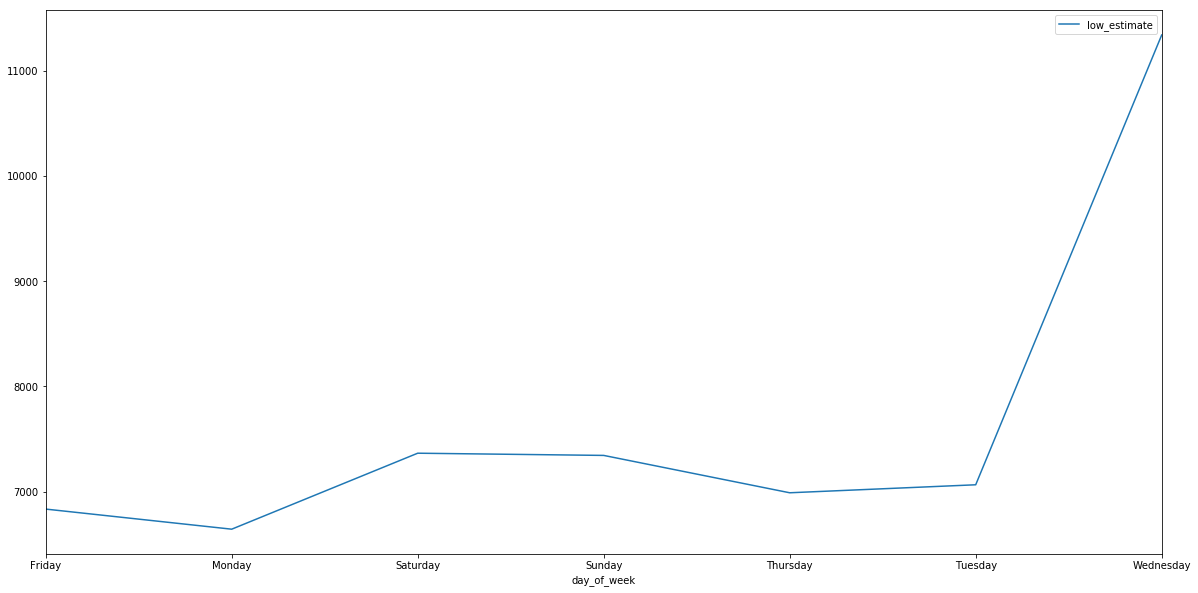

In [26]:
import numpy as np # low estimate trend based on week day
uber_by_day = uberWAV[["day_of_week","low_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

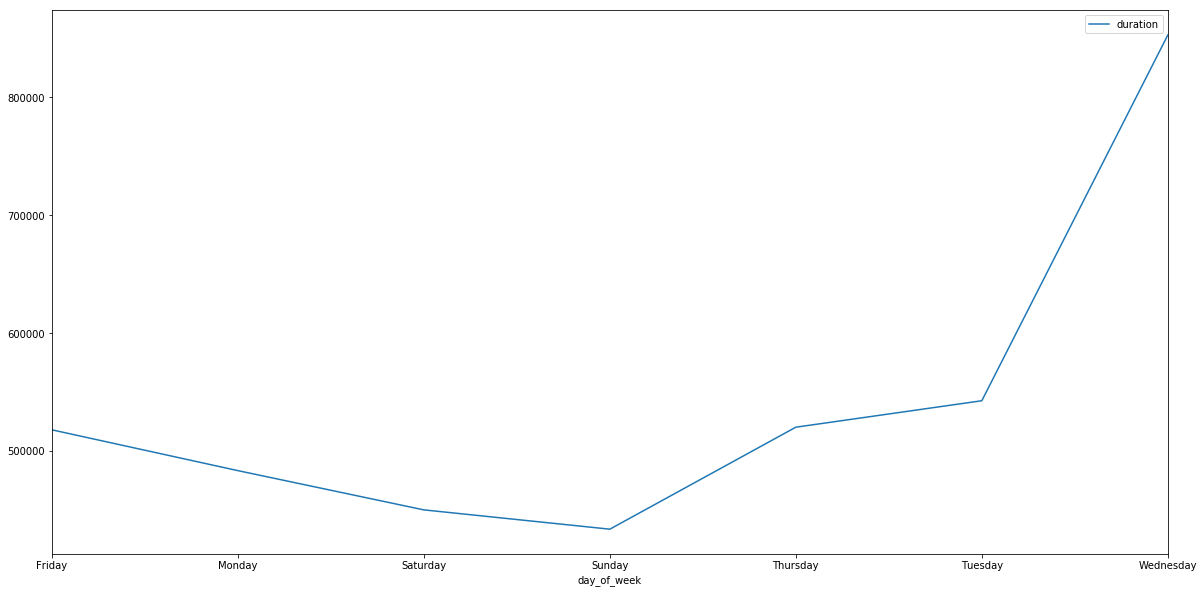

In [27]:
import numpy as np #Duration trend based on weekday
uber_by_day = uberWAV[["day_of_week","duration"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

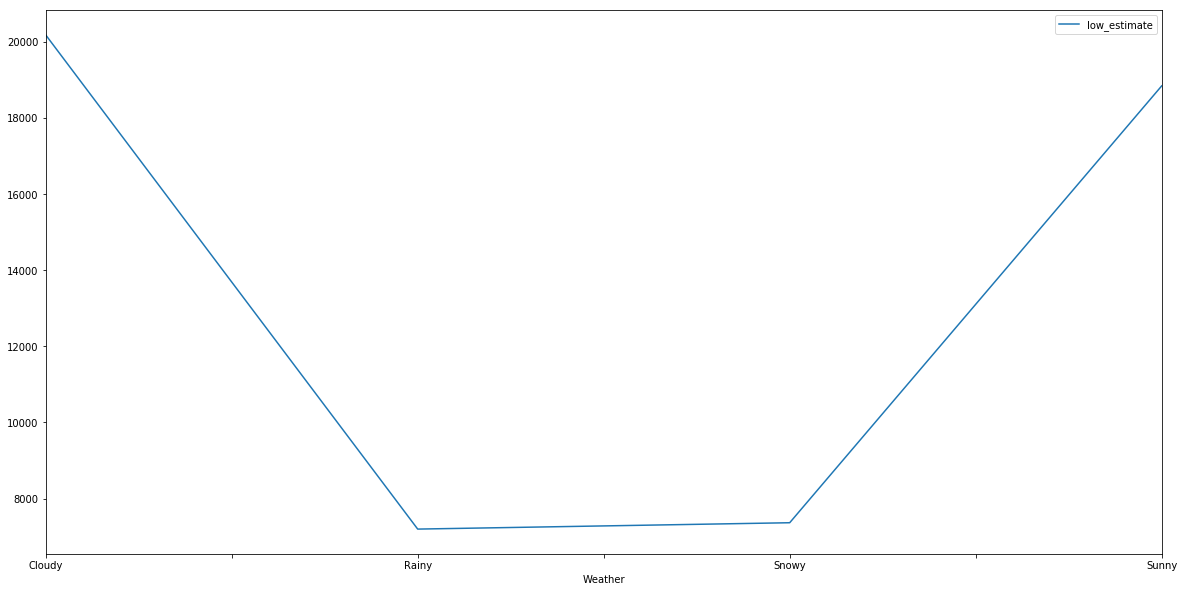

In [28]:
import numpy as np #low estimate trend based on weather
uber_by_weather = uberWAV[["Weather","low_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();

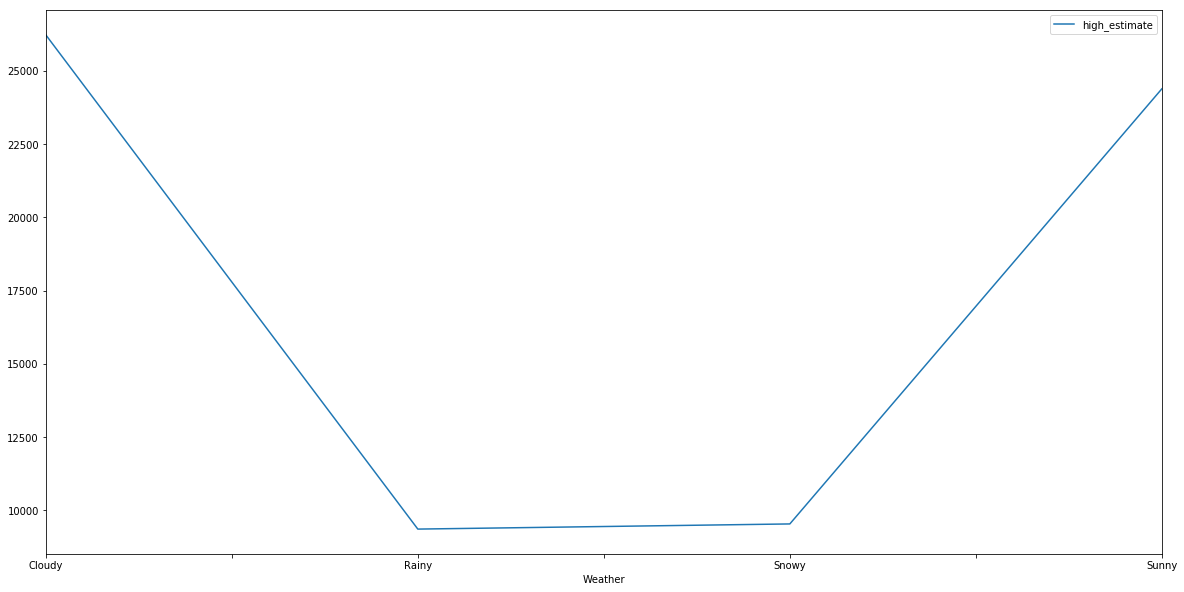

In [29]:
import numpy as np #High estimate trend based on weather
uber_by_weather = uberWAV[["Weather","high_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();

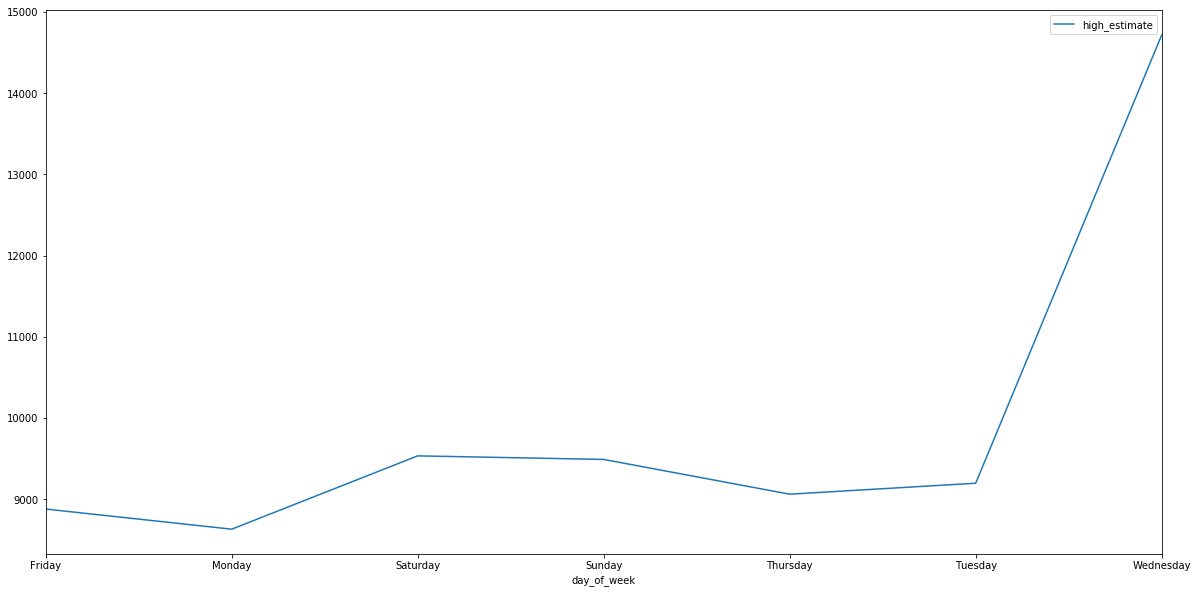

In [30]:
import numpy as np #high estimate trend based on week day
uber_by_day = uberWAV[["day_of_week","high_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

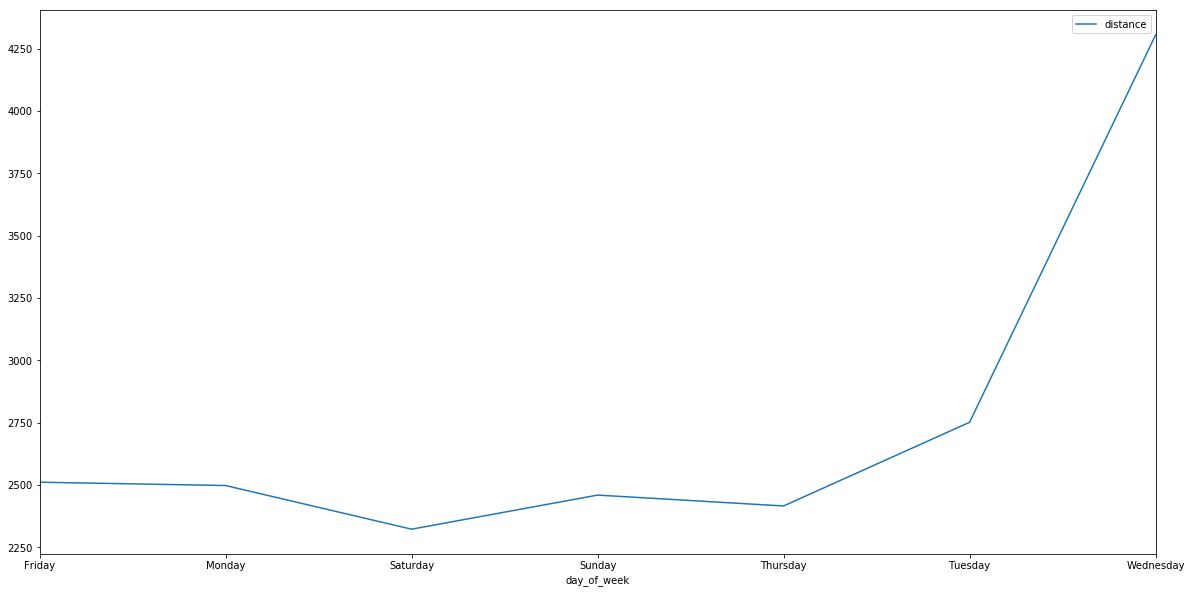

In [31]:
import numpy as np #distance trend based on weekday
uber_by_day = uberWAV[["day_of_week","distance"]].groupby("day_of_week").aggregate(np.sum) # to find the day on which distance travelled is the most
uber_by_day.plot();

In [32]:
# Dropping columns of least significance for further analysis
uber.drop(['currency_code', 'estimate', 'localized_display_name', 'product_id', 'time', 'date', 'start_latitude', 'start_longitude'  ], axis =1, inplace = True) # Dropping cells as data is insignificant

In [33]:
uber.dtypes # data types check

date_time        datetime64[ns]
display_name             object
distance                float64
duration                  int64
end_latitude            float64
end_longitude           float64
high_estimate           float64
low_estimate            float64
day_of_week              object
Weather                  object
dtype: object

In [34]:
#import numpy as np
#import pandas as pd
#import holoviews as hv

#%matplotlib inline

#hv.extension('bokeh', 'matplotlib', width="100")
#%opts Curve [width=600 height=250 tools=['hover'] ] {+framewise} VLine (color="black")
#%opts Bars  [width=800 height=400 tools=['hover'] group_index=1 legend_position='top_left' xrotation=90]
#hv.extension('bokeh')

In [35]:
uber.count() # to check if null values are present

date_time        43896
display_name     43896
distance         43896
duration         43896
end_latitude     43896
end_longitude    43896
high_estimate    43896
low_estimate     43896
day_of_week      43896
Weather          43896
dtype: int64

In [36]:
print(min(uber.index)) # checkin table indexes
print(max(uber.index))

0
51210


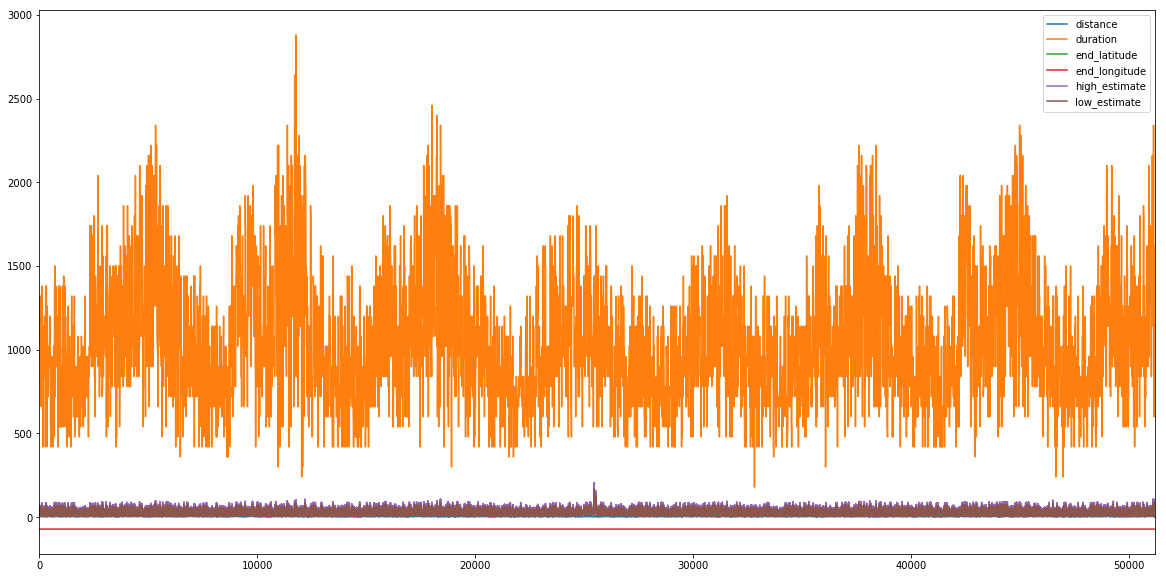

In [37]:
uber.plot()

In [38]:
days = {'Monday':0 ,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4, 'Saturday':5, 'Sunday':6}

uber['day_of_week'] = uber['day_of_week'].apply(lambda x: days[x])
#Assigning weights to days of the weeek

In [39]:
uber.head() # display dataframe

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,Rainy
1,2017-12-05 22:47:56,uberX,8.24,1080,42.314857,-71.056782,23.0,18.0,1,Rainy
2,2017-12-05 22:47:56,uberSUV,8.24,1080,42.314857,-71.056782,63.0,50.0,1,Rainy
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,Rainy
4,2017-12-05 22:47:56,UberBLACK,8.24,1080,42.314857,-71.056782,51.0,41.0,1,Rainy


In [40]:
#days = {'uberWAV':1 ,'uberXL':2,'uberPOOL':3,'uberX':4,'UberBLACK':5, 'uberSUV':6}

#uber['display_name'] = uber['display_name'].apply(lambda x: days[x])

In [41]:
climate = {'Snowy':1 ,'Rainy':2,'Sunny':3,'Cloudy':4} # Number based on ascending order of the number of rides in a particular weather

uber['Weather'] = uber['Weather'].apply(lambda x: climate[x])

In [42]:
uber.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,2
1,2017-12-05 22:47:56,uberX,8.24,1080,42.314857,-71.056782,23.0,18.0,1,2
2,2017-12-05 22:47:56,uberSUV,8.24,1080,42.314857,-71.056782,63.0,50.0,1,2
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,2
4,2017-12-05 22:47:56,UberBLACK,8.24,1080,42.314857,-71.056782,51.0,41.0,1,2


In [43]:
uber.dtypes

date_time        datetime64[ns]
display_name             object
distance                float64
duration                  int64
end_latitude            float64
end_longitude           float64
high_estimate           float64
low_estimate            float64
day_of_week               int64
Weather                   int64
dtype: object

In [44]:
#here we will separate the 6 different types of uber services into their own dataframes
uberWAV = uber[uber.display_name == 'uberWAV']
uberWAV.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
5,2017-12-05 22:47:56,uberWAV,8.24,1080,42.314857,-71.056782,23.0,18.0,1,2
12,2017-12-05 22:47:56,uberWAV,8.24,1080,42.314857,-71.056782,23.0,18.0,1,2
19,2017-12-05 22:48:51,uberWAV,6.18,1140,42.272678,-71.093765,19.0,15.0,1,2
26,2017-12-05 22:48:51,uberWAV,6.18,1140,42.272678,-71.093765,19.0,15.0,1,2
33,2017-12-05 22:51:50,uberWAV,8.53,1320,42.247948,-71.173050,25.0,20.0,1,2


In [45]:
#remove duplicated datetimeindex
uberWAV = uberWAV[~uberWAV.date_time.duplicated(keep = 'first')]
uberWAV.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
5,2017-12-05 22:47:56,uberWAV,8.24,1080,42.314857,-71.056782,23.0,18.0,1,2
19,2017-12-05 22:48:51,uberWAV,6.18,1140,42.272678,-71.093765,19.0,15.0,1,2
33,2017-12-05 22:51:50,uberWAV,8.53,1320,42.247948,-71.173050,25.0,20.0,1,2
47,2017-12-05 22:54:57,uberWAV,3.24,840,42.338443,-71.074548,14.0,10.0,1,2
61,2017-12-05 22:57:49,uberWAV,4.14,720,42.360958,-71.065895,15.0,12.0,1,2


In [46]:
# Checking if duplicates are removed
uberWAV.tail()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
51147,2017-12-13 15:27:19,uberWAV,1.94,600,42.346358,-71.097615,13.0,9.0,2,3
51161,2017-12-13 15:30:19,uberWAV,4.57,1620,42.358536,-71.060788,24.0,19.0,2,3
51175,2017-12-13 15:33:24,uberWAV,1.94,660,42.346358,-71.097615,13.0,10.0,2,3
51189,2017-12-13 15:36:21,uberWAV,6.09,1440,42.350274,-71.051305,20.0,16.0,2,3
51203,2017-12-13 15:39:19,uberWAV,3.20,900,42.322207,-71.170310,19.0,15.0,2,3


In [47]:
#Counting total records
uberWAV.count()

date_time        3658
display_name     3658
distance         3658
duration         3658
end_latitude     3658
end_longitude    3658
high_estimate    3658
low_estimate     3658
day_of_week      3658
Weather          3658
dtype: int64

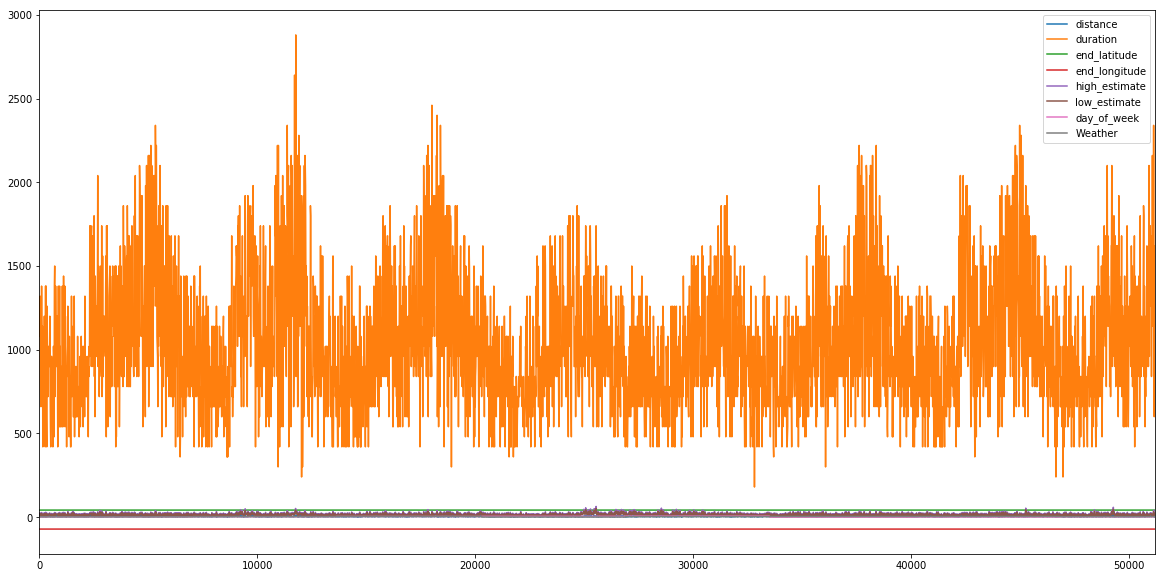

In [48]:
uberWAV.plot() # plotting dataframe

In [49]:
#hv.Curve(uber_by_weather)

In [50]:
uberWAV['high_estimate'].mean() # Calculate mean of high range

19.000273373428104

In [51]:
uberWAV['high_estimate'].var() # Calculate variance

47.45337701028851

In [52]:
uberWAV['high_estimate'].std() # Calculate Standard deviation

6.888641158478827

In [53]:
uberWAV.drop(['display_name', 'date_time'], axis =1, inplace = True) # Dropping cells as data is insignificant

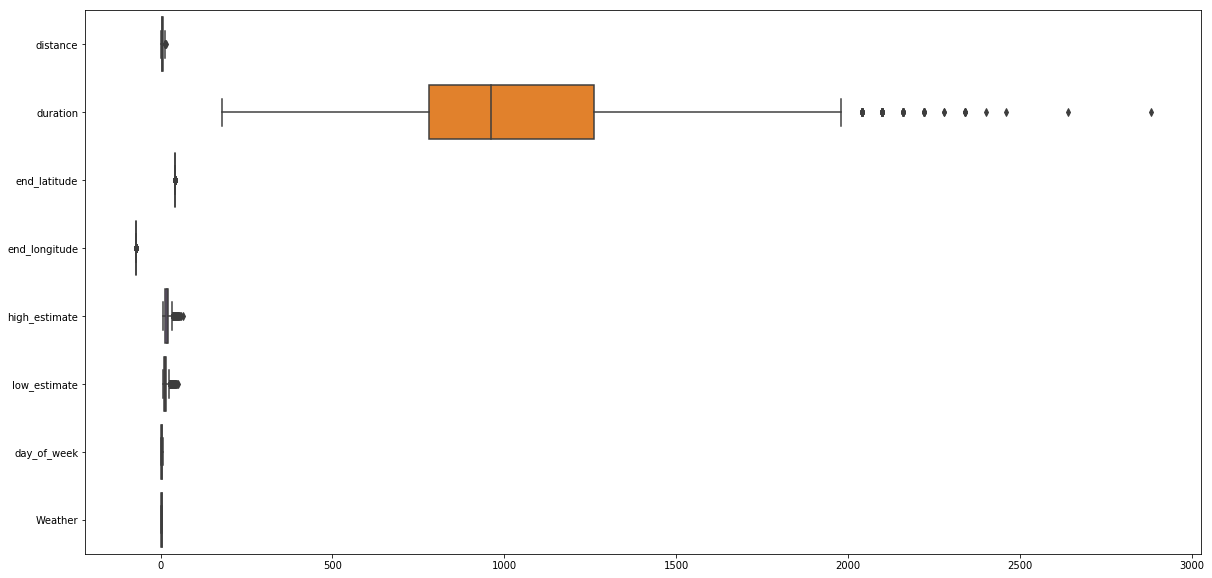

In [54]:
sns.boxplot(data=uberWAV, orient="h") # to check for outliers

In [55]:
uberWAV['high_estimate'] = uberWAV['high_estimate'].apply(lambda x: "HH" if x>= uberWAV['high_estimate'].mean() else "HL") #Converting high estimate as HH for prices greater than mean and HL for prices less than mean for analysis

In [56]:
uberWAV.head() # displaying data

,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
5,8.24,1080,42.314857,-71.056782,HH,18.0,1,2
19,6.18,1140,42.272678,-71.093765,HL,15.0,1,2
33,8.53,1320,42.247948,-71.173050,HH,20.0,1,2
47,3.24,840,42.338443,-71.074548,HL,10.0,1,2
61,4.14,720,42.360958,-71.065895,HL,12.0,1,2


In [57]:
uberWAV.groupby('high_estimate').count() # Counting the total number of records

,distance,duration,end_latitude,end_longitude,low_estimate,day_of_week,Weather
high_estimate,,,,,,,
HH,1462,1462,1462,1462,1462,1462,1462
HL,2196,2196,2196,2196,2196,2196,2196


In [58]:
uberWAV.describe() # Describing columns

,distance,duration,end_latitude,end_longitude,low_estimate,day_of_week,Weather
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,5.265282,1039.043193,42.339442,-71.076939,14.648989,2.895845,2.995353
std,2.761660,391.295588,0.034898,0.037666,5.644885,1.930238,1.021363
min,1.290000,180.000000,42.247948,-71.173050,6.000000,0.000000,1.000000
25%,3.142500,780.000000,42.322207,-71.093765,11.000000,1.000000,2.000000
50%,4.695000,960.000000,42.348773,-71.074474,14.000000,3.000000,3.000000
75%,6.860000,1260.000000,42.360958,-71.057072,17.000000,5.000000,4.000000
max,14.530000,2880.000000,42.423240,-70.986913,52.000000,6.000000,4.000000


In [59]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
uberWAV_scaled = scaled_df(uberWAV)
# Scaling to remove outliers

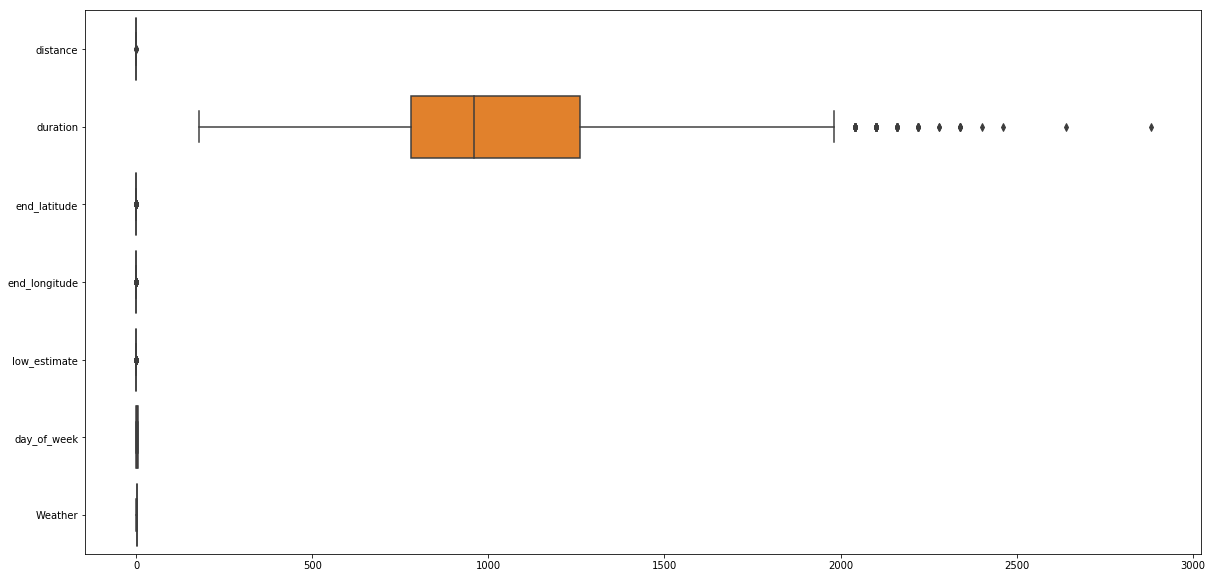

In [60]:
sns.boxplot(data=uberWAV_scaled, orient="h")

In [61]:
uberWAV_scaled.dtypes

distance         float64
duration           int64
end_latitude     float64
end_longitude    float64
high_estimate     object
low_estimate     float64
day_of_week        int64
Weather            int64
dtype: object

In [62]:
predictor_names = ['distance', 'duration', 'low_estimate', 'Weather', 'day_of_week', 'end_latitude', 'end_longitude']
# Defining factors affecting the ride

In [63]:
uberWAV_scaled.dtypes

distance         float64
duration           int64
end_latitude     float64
end_longitude    float64
high_estimate     object
low_estimate     float64
day_of_week        int64
Weather            int64
dtype: object

In [64]:
# Defining the input and output varibles
X = uberWAV_scaled[predictor_names]

#setting target
y = uberWAV_scaled['high_estimate']

In [65]:

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [66]:
from sklearn import svm # importing library for support vector machines

In [67]:
#setting rbfKernel svm classifier

rbfKernel = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(rbfKernel,X,y,cv=10).mean())
#SVM metrics
sm = rbfKernel.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.752672394469
Accuracy score using SVM is 0.810109289617


In [68]:
from sklearn.metrics import confusion_matrix # Analysis on the model

In [69]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(396, 195, 83, 790)

In [70]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [71]:
misclassificationRate = False_Positive + False_Negative/ total #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)


misclassificationRate: 195.056693989
precision: 0.802030456853
truePositiveRate :  0.904925544101
falsePositiveRate :  0.329949238579
Specificity :  0.670050761421
Prevalence :  0.539617486339


In [72]:
from sklearn.metrics import classification_report

In [73]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         HH       0.83      0.67      0.74       591
         HL       0.80      0.90      0.85       873

avg / total       0.81      0.81      0.81      1464



In [74]:
knn_k = []
for i in range(0,33):  # try up to k=33
    if (i % 2 != 0): # Use only odd k 
        knn_k.append(i)

cross_vals = []
for k in knn_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             X_train, 
                             y_train, 
                             cv = 10, 
                             scoring='accuracy')
    cross_vals.append(scores.mean())

MSE = [1 - x for x in cross_vals]
optimal_k = knn_k[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 1


In [75]:

# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=13)

# kNN cross validation

#print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using kNN is 0.828551912568


In [76]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(423, 168, 83, 790)

In [77]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         HH       0.84      0.72      0.77       591
         HL       0.82      0.90      0.86       873

avg / total       0.83      0.83      0.83      1464



In [78]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [79]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 168.056693989
precision: 0.824634655532
truePositiveRate :  0.904925544101
falsePositiveRate :  0.284263959391
Specificity :  0.715736040609
Prevalence :  0.539617486339


In [80]:

from sklearn.naive_bayes import MultinomialNB, GaussianNB


In [81]:
# testing accuracy of Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.758196721311


In [82]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred_class).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(352, 239, 115, 758)

In [83]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [84]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 239.078551913
precision: 0.760280842528
truePositiveRate :  0.868270332188
falsePositiveRate :  0.404399323181
Specificity :  0.595600676819
Prevalence :  0.517759562842


In [85]:
report = classification_report(y_test, y_pred_class)
print(report)

             precision    recall  f1-score   support

         HH       0.75      0.60      0.67       591
         HL       0.76      0.87      0.81       873

avg / total       0.76      0.76      0.75      1464



In [86]:
# testing accuracy of Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class_gnb = gnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class_gnb))

0.928278688525


In [87]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred_class_gnb).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(556, 35, 70, 803)

In [88]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [89]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 35.0478142077
precision: 0.958233890215
truePositiveRate :  0.91981672394
falsePositiveRate :  0.0592216582064
Specificity :  0.940778341794
Prevalence :  0.54849726776


In [90]:
report = classification_report(y_test, y_pred_class_gnb)
print(report)

             precision    recall  f1-score   support

         HH       0.89      0.94      0.91       591
         HL       0.96      0.92      0.94       873

avg / total       0.93      0.93      0.93      1464

